# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [1]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")
test_x = pd.read_csv("test_x.csv")
test_y = pd.read_csv("test_y.csv")

In [2]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [4]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [5]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(test_x)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 3270402.95091
Root Mean Squared Error : 1808.42554
r2 :  0.7433398998593388


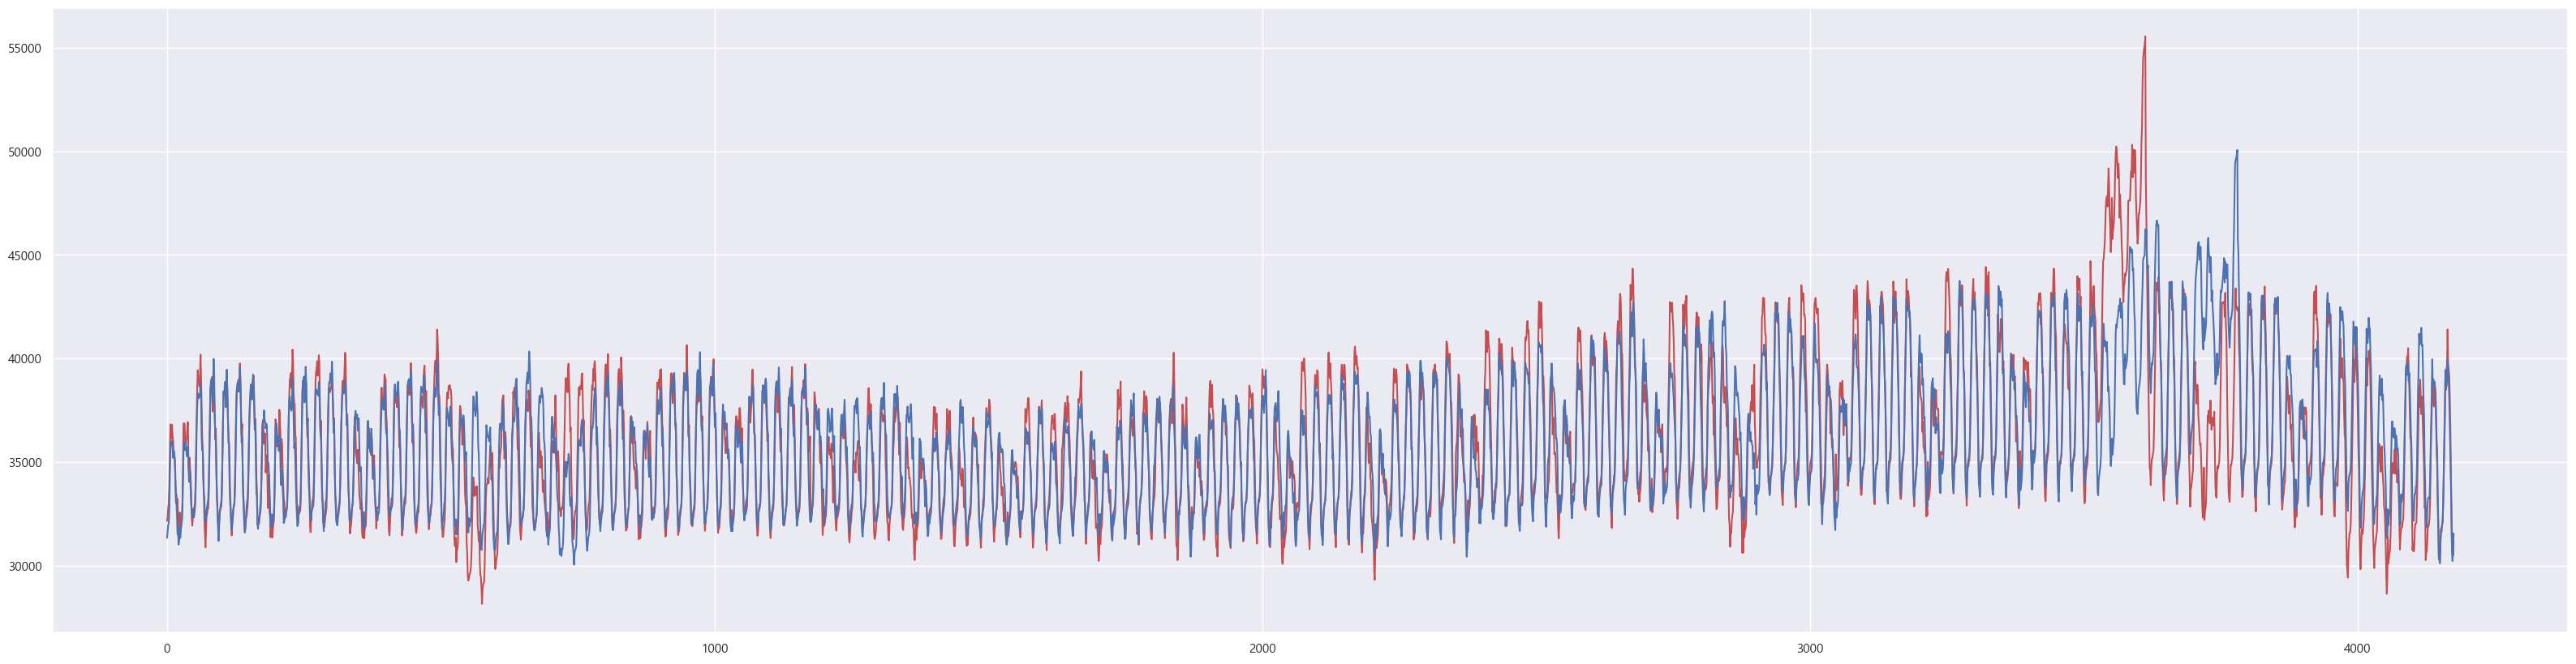

In [6]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_LR)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [7]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\서대표\AppData\Local\Temp\ipykernel_10896\4150206231.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_reg.fit(train_x, train_y)


RandomForestRegressor()

In [8]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(test_x)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))


RandomForestRegressor
Mean Squared Error : 3753545.55935
Root Mean Squared Error : 1937.40692
r2 :  0.705423033918175


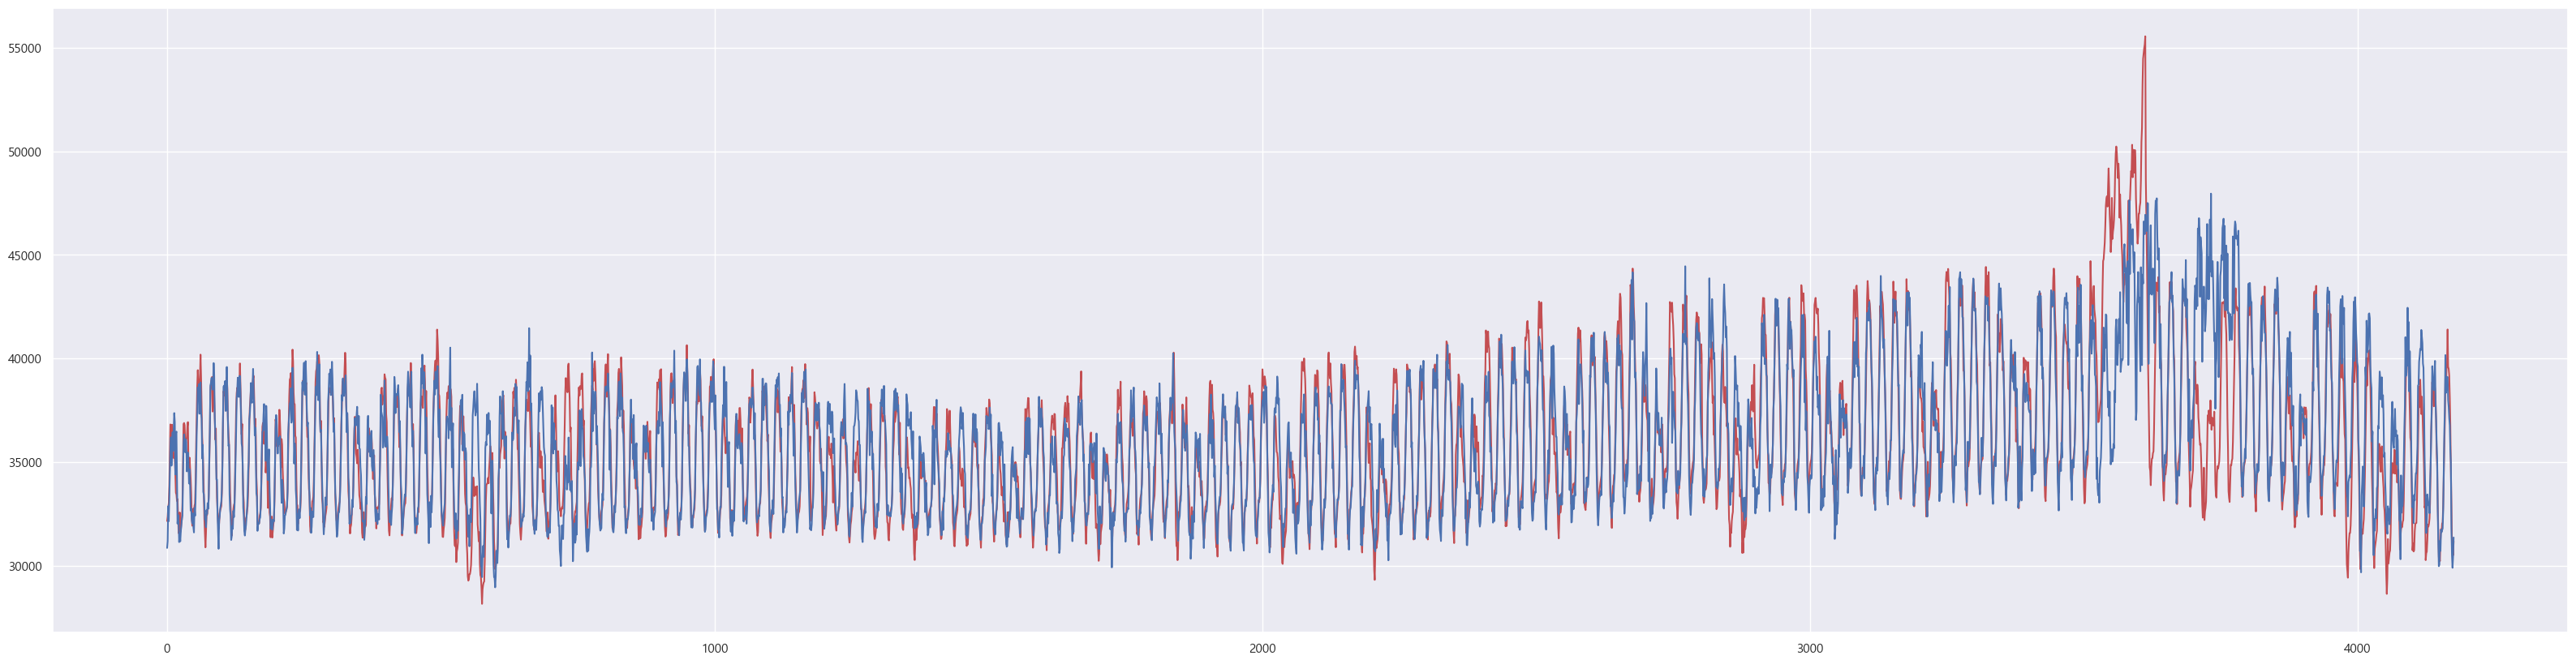

In [9]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [10]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0    0.204658
feature 1    0.795342
dtype: float64

In [11]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)


C:\Users\서대표\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [13]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(test_x)

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 3336892.61460
Root Mean Squared Error : 1826.71635
r2 :  0.738121813893678


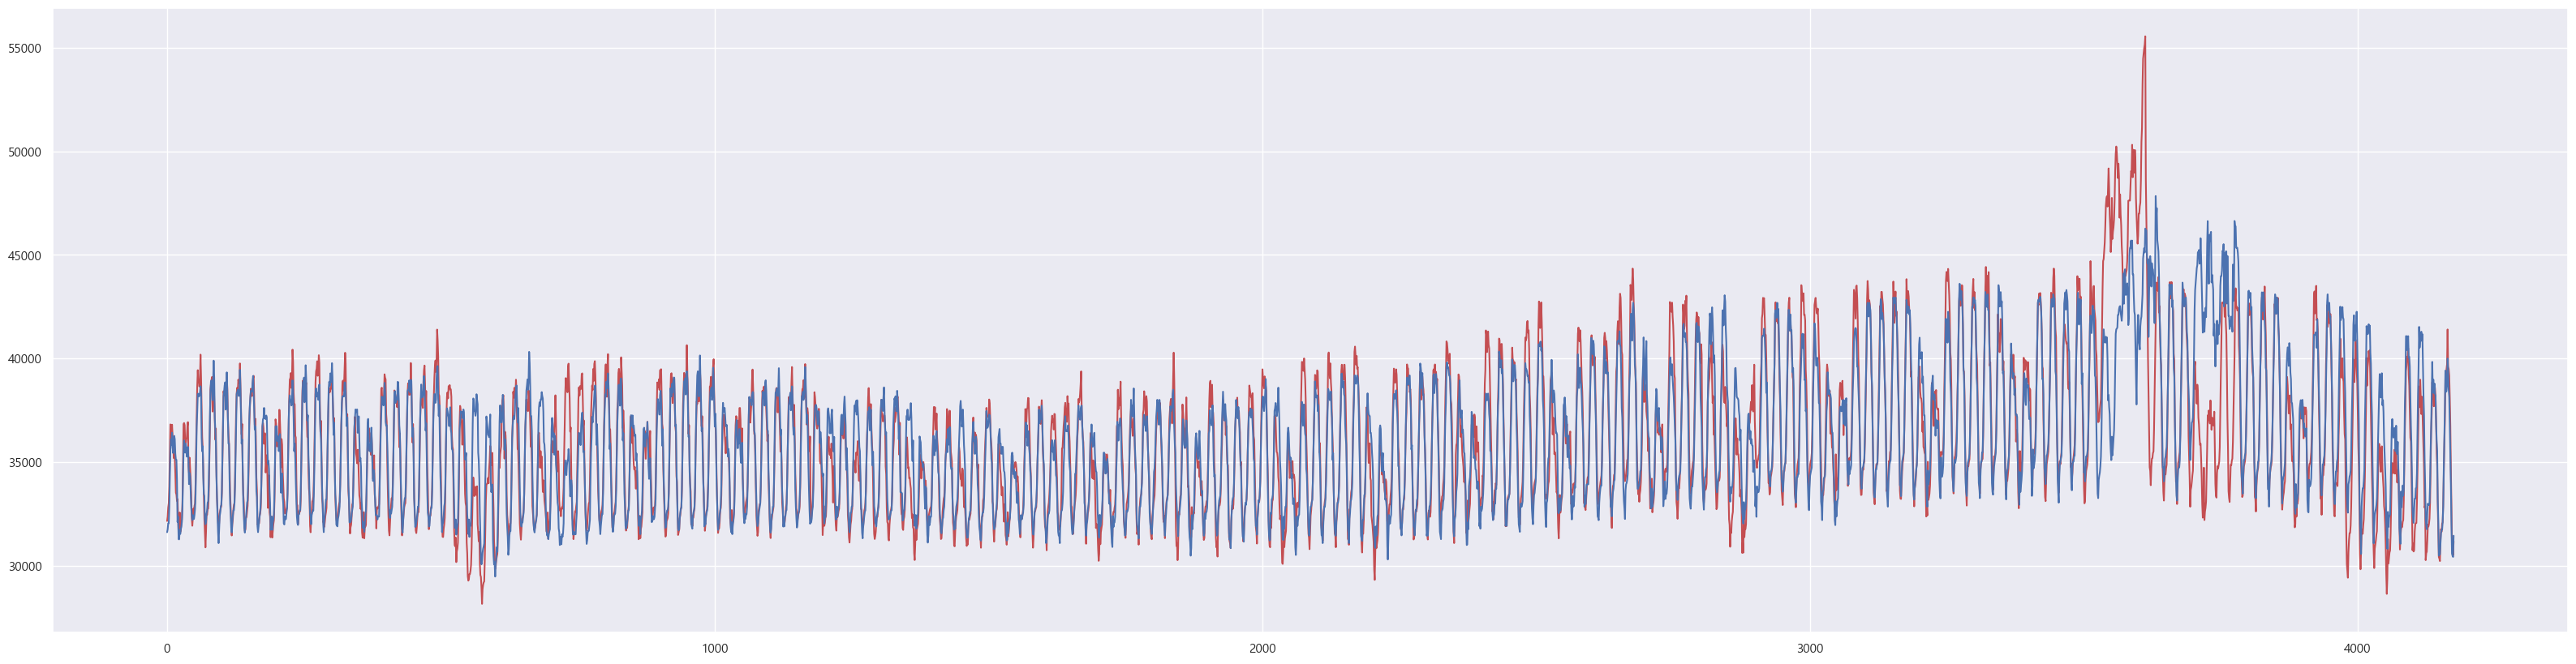

In [14]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [15]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances



feature 0    0.200301
feature 1    0.799699
dtype: float64

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [16]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

In [17]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 3394860.05316
Root Mean Squared Error : 1842.51460
r2 :  0.733572549228307


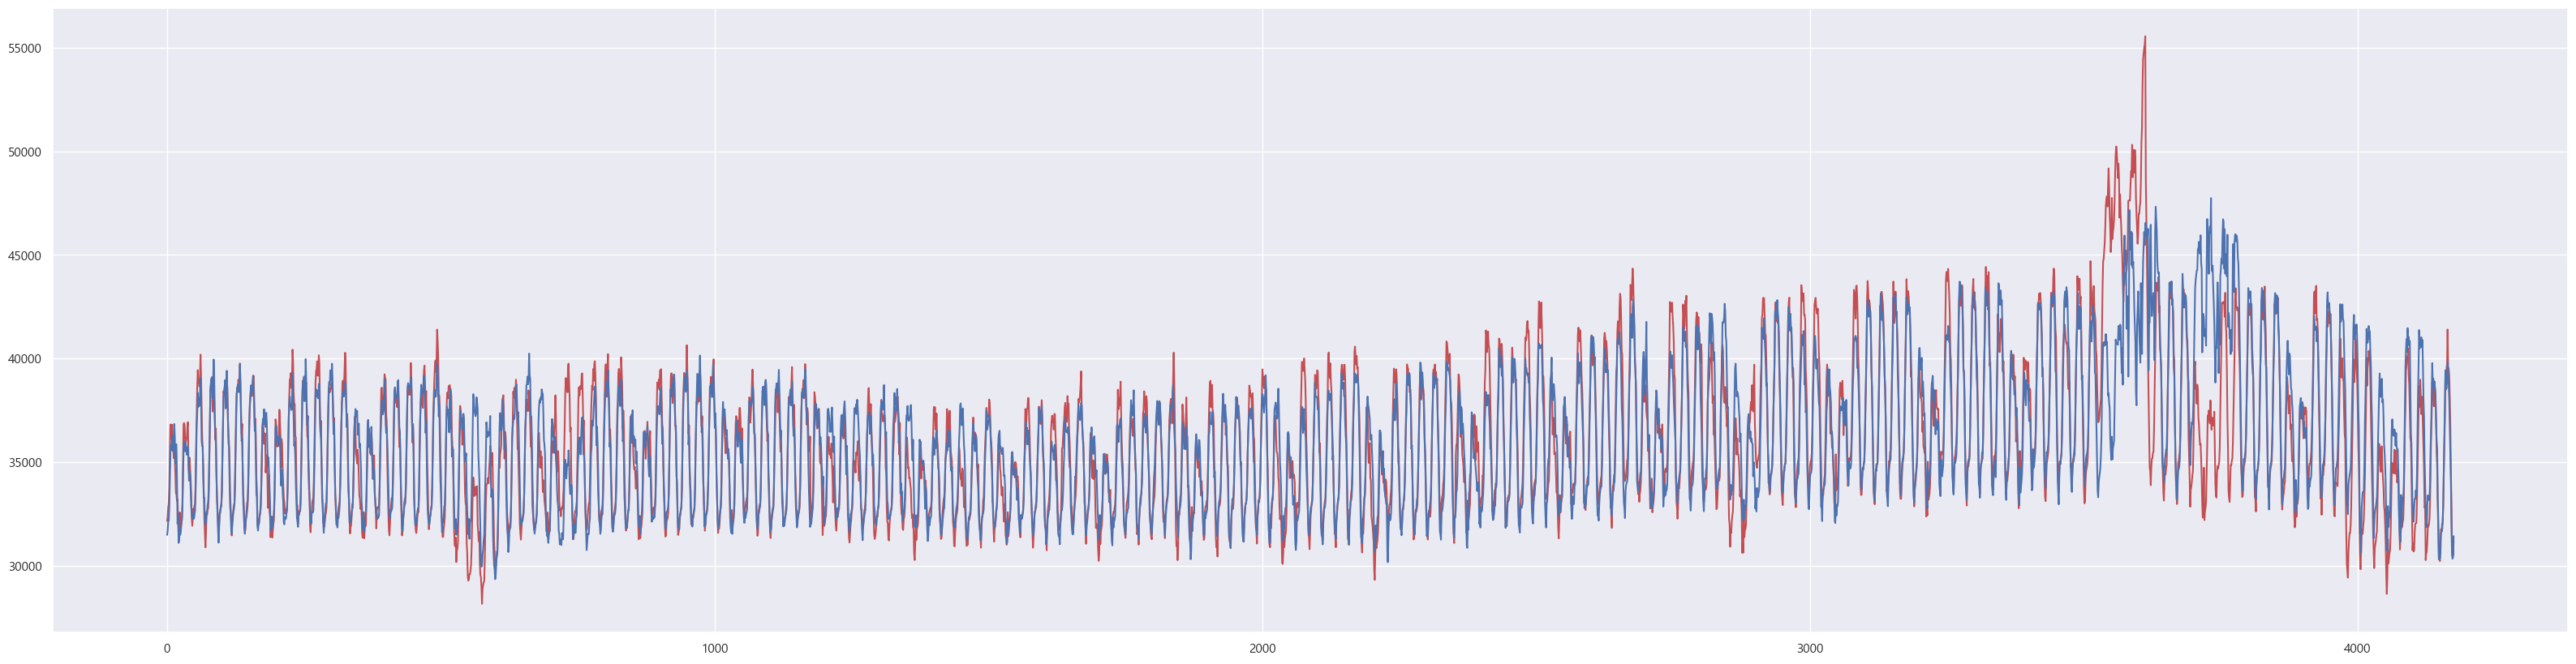

In [18]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

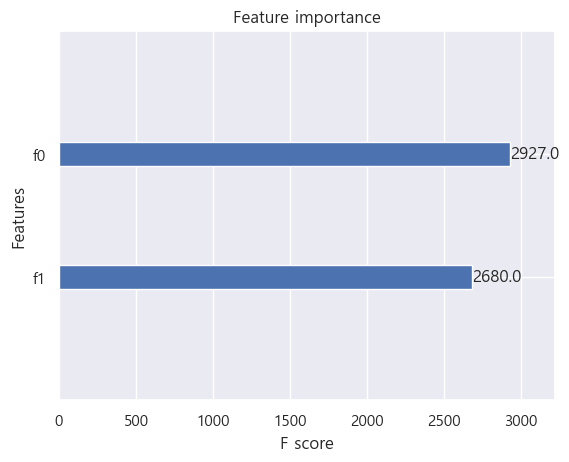

In [19]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)



In [20]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링 test
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [21]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

In [22]:
scaler.fit(test_x)
scaled_test_x = scaler.transform(test_x)

In [23]:
# 아래에 실습코드를 작성하세요.

scaled_train_x

array([[0.15538966, 0.16070305],
       [0.15600652, 0.14840061],
       [0.16122772, 0.150233  ],
       ...,
       [0.18234751, 0.17842033],
       [0.18210629, 0.16510552],
       [0.16446693, 0.18128672]])

In [24]:
LR_reg.fit(scaled_train_x, train_y)
scaled_y_pred_LR = LR_reg.predict(scaled_test_x)

In [25]:
print('scaled_LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_LR))))
print("r2 : ", r2(test_y,scaled_y_pred_LR))

scaled_LinearRegression
Mean Squared Error : 4062798.12746
Root Mean Squared Error : 2015.63839
r2 :  0.6811529986068101


In [26]:
xgb_reg.fit(scaled_train_x, train_y)
scaled_y_pred_xgb = xgb_reg.predict(scaled_test_x)

In [27]:
print('scaled_Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_xgb))))
print("r2 : ", r2(test_y,scaled_y_pred_xgb))

scaled_Xgboost
Mean Squared Error : 4103087.02674
Root Mean Squared Error : 2025.60782
r2 :  0.6779911396314153


# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [30]:
history1 = model1.fit(train_x, train_y, epochs= 5, validation_split=0.2)

Epoch 1/5
1084/1084 [==============================] - 2s 1ms/step - loss: 30595262.0000 - mse: 30595262.0000 - val_loss: 920342.9375 - val_mse: 920342.9375
Epoch 2/5
1084/1084 [==============================] - 1s 1ms/step - loss: 2650327.0000 - mse: 2650327.0000 - val_loss: 1030498.2500 - val_mse: 1030498.2500
Epoch 3/5
1084/1084 [==============================] - 1s 1ms/step - loss: 2670210.0000 - mse: 2670210.0000 - val_loss: 956539.0000 - val_mse: 956539.0000
Epoch 4/5
1084/1084 [==============================] - 1s 1ms/step - loss: 2733249.0000 - mse: 2733249.0000 - val_loss: 953120.9375 - val_mse: 953120.9375
Epoch 5/5
1084/1084 [==============================] - 1s 1ms/step - loss: 2681479.5000 - mse: 2681479.5000 - val_loss: 914445.2500 - val_mse: 914445.2500


In [31]:
y_pred_deep1 = model1.predict(test_x)

131/131 [==============================] - 0s 601us/step


In [32]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))


DEEP1
Mean Squared Error : 3534174.19587
Root Mean Squared Error : 1879.93994
r2 :  0.7226392231655266


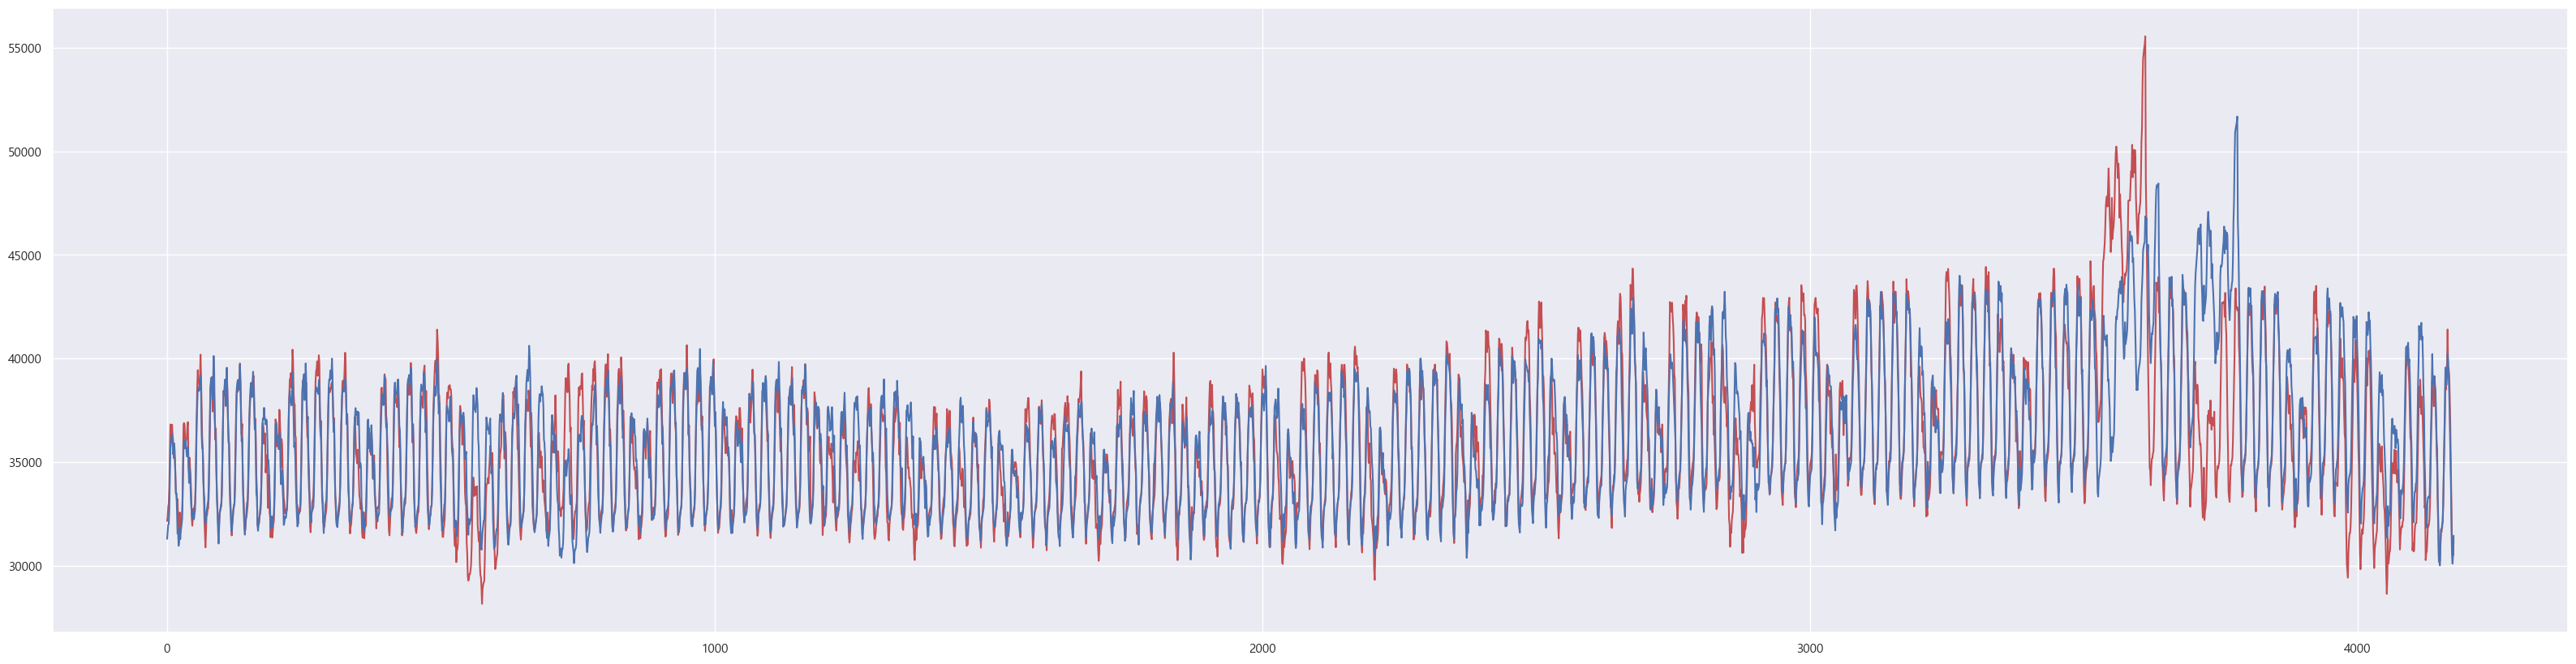

In [33]:

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)


In [12]:
import catboost

In [13]:
cb = catboost.CatBoostRegressor()
cb.fit(train_x, train_y.ravel())

Learning rate set to 0.07427
0:	learn: 4044.8534821	total: 162ms	remaining: 2m 41s
1:	learn: 3801.3541502	total: 166ms	remaining: 1m 23s
2:	learn: 3578.3098420	total: 172ms	remaining: 57s
3:	learn: 3374.4648915	total: 176ms	remaining: 43.8s
4:	learn: 3187.2948579	total: 180ms	remaining: 35.8s
5:	learn: 3017.8073869	total: 184ms	remaining: 30.5s
6:	learn: 2861.1307465	total: 188ms	remaining: 26.7s
7:	learn: 2718.1995705	total: 192ms	remaining: 23.8s
8:	learn: 2587.9354194	total: 196ms	remaining: 21.6s
9:	learn: 2469.3487900	total: 200ms	remaining: 19.8s
10:	learn: 2363.3924308	total: 203ms	remaining: 18.3s
11:	learn: 2266.2237589	total: 207ms	remaining: 17.1s
12:	learn: 2180.9542918	total: 212ms	remaining: 16.1s
13:	learn: 2102.2959905	total: 216ms	remaining: 15.2s
14:	learn: 2031.2935237	total: 220ms	remaining: 14.5s
15:	learn: 1967.8762376	total: 224ms	remaining: 13.8s
16:	learn: 1910.9246387	total: 229ms	remaining: 13.2s
17:	learn: 1859.8541258	total: 232ms	remaining: 12.7s
18:	learn

161:	learn: 1455.7516035	total: 785ms	remaining: 4.06s
162:	learn: 1455.6336888	total: 789ms	remaining: 4.05s
163:	learn: 1455.4802550	total: 794ms	remaining: 4.05s
164:	learn: 1455.3423594	total: 798ms	remaining: 4.04s
165:	learn: 1455.2233064	total: 802ms	remaining: 4.03s
166:	learn: 1455.0282380	total: 806ms	remaining: 4.02s
167:	learn: 1454.8523967	total: 809ms	remaining: 4.01s
168:	learn: 1454.6537861	total: 813ms	remaining: 4s
169:	learn: 1454.5573202	total: 817ms	remaining: 3.99s
170:	learn: 1454.4249934	total: 821ms	remaining: 3.98s
171:	learn: 1454.2954400	total: 825ms	remaining: 3.97s
172:	learn: 1454.1109376	total: 829ms	remaining: 3.96s
173:	learn: 1454.0102455	total: 832ms	remaining: 3.95s
174:	learn: 1453.8592895	total: 836ms	remaining: 3.94s
175:	learn: 1453.6709899	total: 840ms	remaining: 3.93s
176:	learn: 1453.5742114	total: 844ms	remaining: 3.92s
177:	learn: 1453.5014647	total: 848ms	remaining: 3.91s
178:	learn: 1453.4337960	total: 851ms	remaining: 3.9s
179:	learn: 14

318:	learn: 1438.1606174	total: 1.39s	remaining: 2.96s
319:	learn: 1438.0976368	total: 1.39s	remaining: 2.96s
320:	learn: 1438.0435741	total: 1.4s	remaining: 2.95s
321:	learn: 1437.9605942	total: 1.4s	remaining: 2.95s
322:	learn: 1437.8598495	total: 1.4s	remaining: 2.94s
323:	learn: 1437.7219792	total: 1.41s	remaining: 2.94s
324:	learn: 1437.6273384	total: 1.41s	remaining: 2.93s
325:	learn: 1437.5523843	total: 1.42s	remaining: 2.93s
326:	learn: 1437.4460969	total: 1.42s	remaining: 2.92s
327:	learn: 1437.4076506	total: 1.42s	remaining: 2.92s
328:	learn: 1437.3231225	total: 1.43s	remaining: 2.91s
329:	learn: 1437.1141379	total: 1.43s	remaining: 2.91s
330:	learn: 1437.0101881	total: 1.44s	remaining: 2.9s
331:	learn: 1436.9594616	total: 1.44s	remaining: 2.9s
332:	learn: 1436.8603195	total: 1.44s	remaining: 2.89s
333:	learn: 1436.8244746	total: 1.45s	remaining: 2.88s
334:	learn: 1436.7831931	total: 1.45s	remaining: 2.88s
335:	learn: 1436.6666233	total: 1.45s	remaining: 2.87s
336:	learn: 143

478:	learn: 1424.9912493	total: 2s	remaining: 2.18s
479:	learn: 1424.8622463	total: 2.01s	remaining: 2.18s
480:	learn: 1424.7403492	total: 2.01s	remaining: 2.17s
481:	learn: 1424.6187077	total: 2.02s	remaining: 2.17s
482:	learn: 1424.5593673	total: 2.02s	remaining: 2.16s
483:	learn: 1424.5060437	total: 2.02s	remaining: 2.16s
484:	learn: 1424.4358224	total: 2.03s	remaining: 2.15s
485:	learn: 1424.2972827	total: 2.03s	remaining: 2.15s
486:	learn: 1424.2595616	total: 2.04s	remaining: 2.15s
487:	learn: 1424.1731691	total: 2.04s	remaining: 2.14s
488:	learn: 1424.1029527	total: 2.04s	remaining: 2.14s
489:	learn: 1423.9712693	total: 2.05s	remaining: 2.13s
490:	learn: 1423.9164408	total: 2.05s	remaining: 2.13s
491:	learn: 1423.8051786	total: 2.06s	remaining: 2.12s
492:	learn: 1423.7566839	total: 2.06s	remaining: 2.12s
493:	learn: 1423.6938246	total: 2.06s	remaining: 2.11s
494:	learn: 1423.5647768	total: 2.07s	remaining: 2.11s
495:	learn: 1423.5219488	total: 2.07s	remaining: 2.1s
496:	learn: 14

635:	learn: 1413.9505937	total: 2.61s	remaining: 1.49s
636:	learn: 1413.8921611	total: 2.62s	remaining: 1.49s
637:	learn: 1413.8428585	total: 2.62s	remaining: 1.49s
638:	learn: 1413.7558671	total: 2.62s	remaining: 1.48s
639:	learn: 1413.7069597	total: 2.63s	remaining: 1.48s
640:	learn: 1413.6797910	total: 2.63s	remaining: 1.47s
641:	learn: 1413.6108929	total: 2.63s	remaining: 1.47s
642:	learn: 1413.5591622	total: 2.64s	remaining: 1.47s
643:	learn: 1413.5116069	total: 2.64s	remaining: 1.46s
644:	learn: 1413.4712567	total: 2.65s	remaining: 1.46s
645:	learn: 1413.3993999	total: 2.65s	remaining: 1.45s
646:	learn: 1413.3479775	total: 2.65s	remaining: 1.45s
647:	learn: 1413.2548668	total: 2.66s	remaining: 1.44s
648:	learn: 1413.1631129	total: 2.66s	remaining: 1.44s
649:	learn: 1413.1134265	total: 2.67s	remaining: 1.44s
650:	learn: 1413.0867175	total: 2.67s	remaining: 1.43s
651:	learn: 1413.0622011	total: 2.67s	remaining: 1.43s
652:	learn: 1413.0103629	total: 2.68s	remaining: 1.42s
653:	learn

798:	learn: 1403.8818779	total: 3.24s	remaining: 815ms
799:	learn: 1403.8343189	total: 3.25s	remaining: 811ms
800:	learn: 1403.8039939	total: 3.25s	remaining: 807ms
801:	learn: 1403.7577545	total: 3.25s	remaining: 803ms
802:	learn: 1403.7117168	total: 3.26s	remaining: 799ms
803:	learn: 1403.6726114	total: 3.26s	remaining: 795ms
804:	learn: 1403.6097403	total: 3.27s	remaining: 791ms
805:	learn: 1403.5795121	total: 3.27s	remaining: 787ms
806:	learn: 1403.5183461	total: 3.27s	remaining: 783ms
807:	learn: 1403.4961213	total: 3.28s	remaining: 779ms
808:	learn: 1403.4595313	total: 3.28s	remaining: 775ms
809:	learn: 1403.3991488	total: 3.28s	remaining: 770ms
810:	learn: 1403.3636486	total: 3.29s	remaining: 766ms
811:	learn: 1403.3448016	total: 3.29s	remaining: 762ms
812:	learn: 1403.2765945	total: 3.29s	remaining: 758ms
813:	learn: 1403.1977532	total: 3.3s	remaining: 754ms
814:	learn: 1403.1264053	total: 3.3s	remaining: 750ms
815:	learn: 1403.0609315	total: 3.31s	remaining: 746ms
816:	learn: 

955:	learn: 1395.9242320	total: 3.85s	remaining: 177ms
956:	learn: 1395.8642521	total: 3.86s	remaining: 173ms
957:	learn: 1395.8281509	total: 3.86s	remaining: 169ms
958:	learn: 1395.7895969	total: 3.86s	remaining: 165ms
959:	learn: 1395.7545560	total: 3.87s	remaining: 161ms
960:	learn: 1395.7043407	total: 3.87s	remaining: 157ms
961:	learn: 1395.6871569	total: 3.88s	remaining: 153ms
962:	learn: 1395.6252108	total: 3.88s	remaining: 149ms
963:	learn: 1395.6016342	total: 3.88s	remaining: 145ms
964:	learn: 1395.5448382	total: 3.89s	remaining: 141ms
965:	learn: 1395.5000766	total: 3.89s	remaining: 137ms
966:	learn: 1395.4274942	total: 3.9s	remaining: 133ms
967:	learn: 1395.4006664	total: 3.9s	remaining: 129ms
968:	learn: 1395.3759827	total: 3.9s	remaining: 125ms
969:	learn: 1395.3431515	total: 3.91s	remaining: 121ms
970:	learn: 1395.3151879	total: 3.91s	remaining: 117ms
971:	learn: 1395.2744137	total: 3.91s	remaining: 113ms
972:	learn: 1395.2434104	total: 3.92s	remaining: 109ms
973:	learn: 1

In [15]:
pred_cb = cb.predict(test_x)

pred_cb = pd.DataFrame({'count': pred_cb})
pred_cb.to_csv('cb_add4features.csv', index_label='id')

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
RMSE = mean_squared_error(test_y, pred_cb)**0.5

In [18]:
RMSE

1870.5272602665423